In [67]:
# Relevant imports
import torch
import sys
import matplotlib.pyplot as plt
import numpy as np
from kan import KAN

# Set the seed for reproducibility
torch.manual_seed(42)

# Add the parent directory of the script (i.e., project/) to sys.path
sys.path.append('../../utils')
from upinn import UPINN
from architectures import FNN, StackedNN, ResNet, count_parameters
from utils import RAD_sampler, sample_collocation_points

In [68]:
# Collocation points
N = 50

Xc = torch.linspace(0, 6*torch.pi, N).reshape(-1, 1)

X_eval = torch.linspace(0, 6*torch.pi, 1000).reshape(-1, 1)

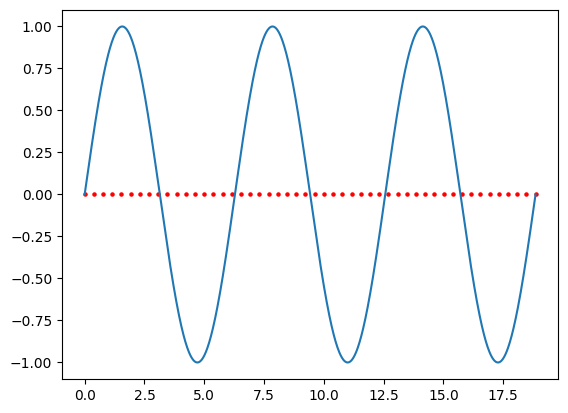

In [69]:
plt.plot(X_eval, torch.sin(X_eval))
plt.scatter(Xc, torch.zeros_like(Xc), color='red', s=5)

In [70]:
u = FNN([1, 20, 20, 1])
optimizer = torch.optim.Adam(u.parameters(), lr=1e-3)

In [71]:
for i in range(10):
    for i in range(1000):
        optimizer.zero_grad()
        loss = torch.mean((u(Xc) - torch.sin(Xc))**2)
        loss.backward()
        optimizer.step()
        if i % 100 == 0:
            print(loss)
    
    Xcand = torch.linspace(0, 6*torch.pi, 10*N).reshape(-1, 1)
    residual = torch.abs(u(Xcand) - torch.sin(Xcand))
    Xc = RAD_sampler(Xcand, residual, 5, 0.5, 0.1)
    

tensor(0.5221, grad_fn=<MeanBackward0>)
tensor(0.4417, grad_fn=<MeanBackward0>)
tensor(0.4196, grad_fn=<MeanBackward0>)
tensor(0.3851, grad_fn=<MeanBackward0>)
tensor(0.3438, grad_fn=<MeanBackward0>)
tensor(0.3218, grad_fn=<MeanBackward0>)
tensor(0.3118, grad_fn=<MeanBackward0>)
tensor(0.3036, grad_fn=<MeanBackward0>)
tensor(0.2952, grad_fn=<MeanBackward0>)
tensor(0.2858, grad_fn=<MeanBackward0>)
tensor(0.5520, grad_fn=<MeanBackward0>)
tensor(0.2950, grad_fn=<MeanBackward0>)
tensor(0.1196, grad_fn=<MeanBackward0>)
tensor(0.0278, grad_fn=<MeanBackward0>)
tensor(0.0197, grad_fn=<MeanBackward0>)
tensor(0.0155, grad_fn=<MeanBackward0>)
tensor(0.0119, grad_fn=<MeanBackward0>)
tensor(0.0087, grad_fn=<MeanBackward0>)
tensor(0.0059, grad_fn=<MeanBackward0>)
tensor(0.0038, grad_fn=<MeanBackward0>)
tensor(2.4392, grad_fn=<MeanBackward0>)
tensor(2.1062e-05, grad_fn=<MeanBackward0>)
tensor(8.6958e-10, grad_fn=<MeanBackward0>)
tensor(3.2666e-14, grad_fn=<MeanBackward0>)
tensor(1.0658e-14, grad_fn=<

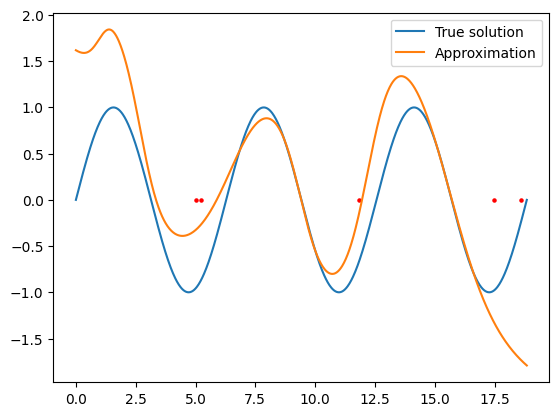

In [72]:
# Plot the results

plt.plot(X_eval, torch.sin(X_eval), label='True solution')
plt.plot(X_eval, u(X_eval).detach(), label='Approximation')
plt.scatter(Xc, torch.zeros_like(Xc), color='red', s=5)
plt.legend()
plt.show()
